# **Exploratory Data Analysis on Titanic Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Basic Info**

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


# **Missing Values**

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


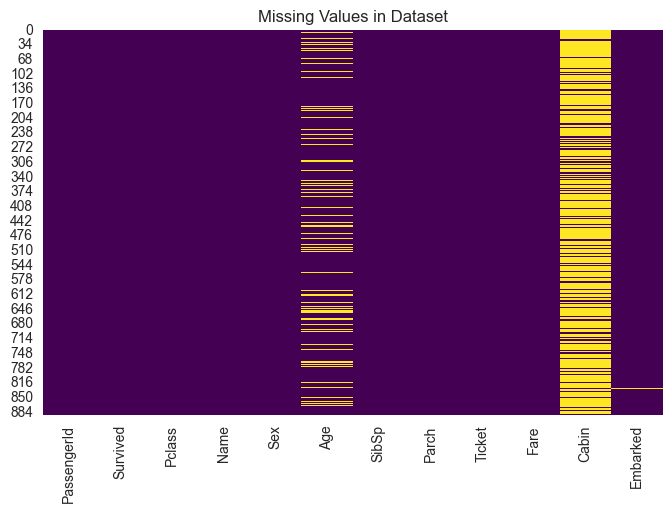

In [6]:
print(df.isnull().sum())

# Missing values heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()

# **Missing Data Handling**

In [14]:
# Drop Cabin column
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Age fill with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Embarked fill with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])




# **Summary Statistics**

In [16]:
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# **Data Type Conversion**

In [17]:
df['Sex'] = df['Sex'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.8+ KB


# **Univariate Analysis**

# **1.Total Survived**

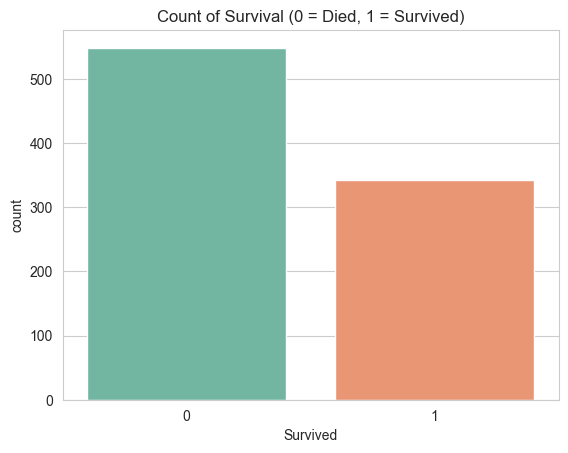

Insight: The majority of passengers did not survive (~62% fatalities, ~38% survived).


In [25]:
sns.countplot(x='Survived', hue='Survived', data=df, palette="Set2", legend=False)
plt.title("Count of Survival (0 = Died, 1 = Survived)")
plt.show()

print("Insight: The majority of passengers did not survive (~62% fatalities, ~38% survived).")


# **2.Sex**

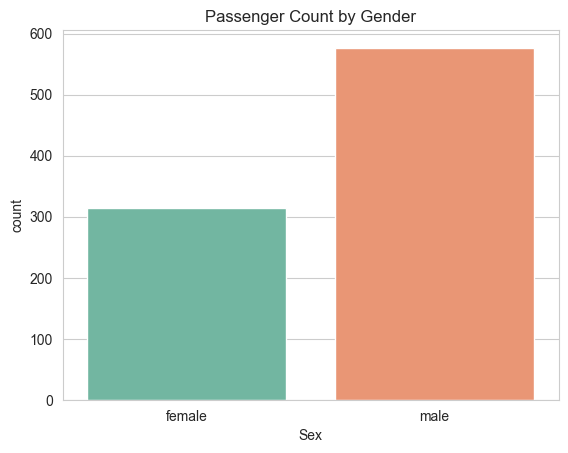

Insight: There were more male passengers than female passengers, but their survival rate was significantly lower.


In [29]:
sns.countplot(x='Sex', hue='Sex', data=df, palette="Set2", legend=False)
plt.title("Passenger Count by Gender")
plt.show()

print("Insight: There were more male passengers than female passengers, but their survival rate was significantly lower.")


# **3.Class**

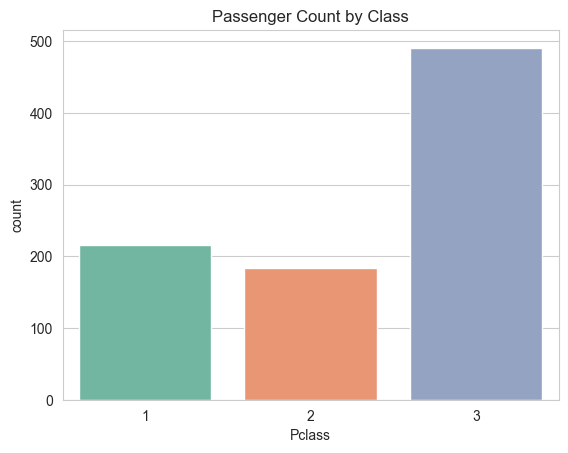

Insight: Most passengers traveled in the 3rd class, followed by 1st and 2nd classes.


In [35]:
sns.countplot(x='Pclass',  hue='Pclass', data=df, palette="Set2", legend=False)
plt.title("Passenger Count by Class")
plt.show()

print("Insight: Most passengers traveled in the 3rd class, followed by 1st and 2nd classes.")


# **4.Embarked**

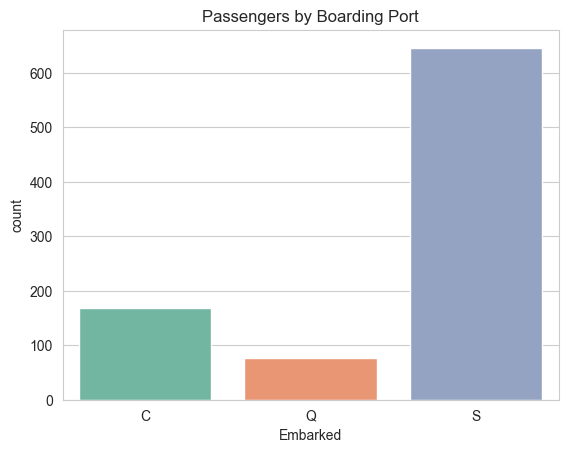

Insight: The majority of passengers boarded from Southampton (S), with fewer from Cherbourg (C) and Queenstown (Q).


In [37]:
sns.countplot(x='Embarked', hue='Embarked', data=df, palette="Set2", legend=False)
plt.title("Passengers by Boarding Port")
plt.show()

print("Insight: The majority of passengers boarded from Southampton (S), with fewer from Cherbourg (C) and Queenstown (Q).")


# **Age Distribution**

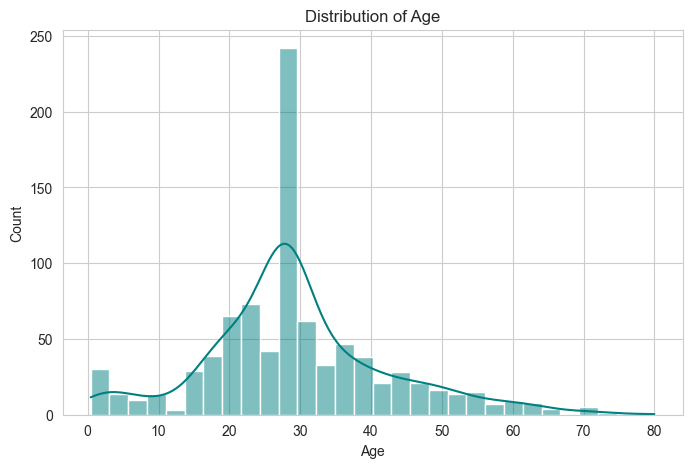

Insight: Most passengers were between 20 and 40 years old.


In [38]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color="teal")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Insight
print("Insight: Most passengers were between 20 and 40 years old.")

# **Fare distribution**

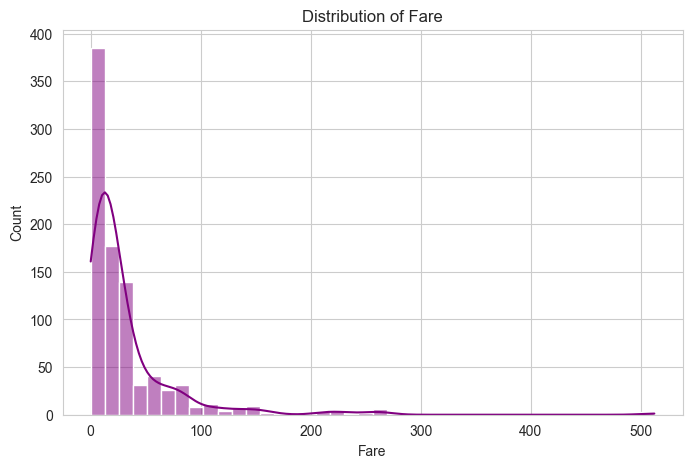

Insight: Fare distribution is right-skewed, indicating most passengers purchased lower-priced tickets.


In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=40, kde=True, color="purple")
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# Insight
print("Insight: Fare distribution is right-skewed, indicating most passengers purchased lower-priced tickets.")

# **Bivariate Distribution**

# **1.Survival Rate by Gender**

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


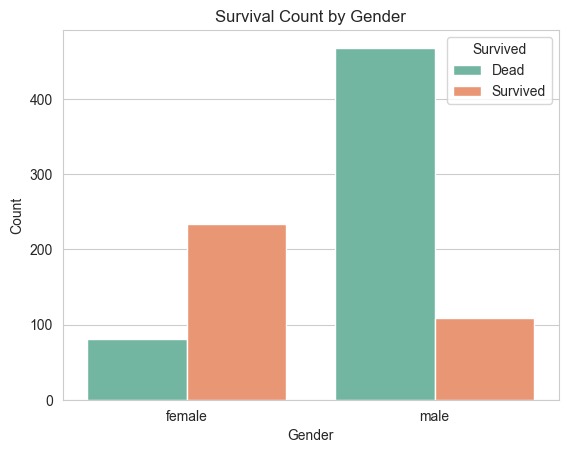

In [55]:
print(df.groupby('Sex', observed=True)['Survived'].apply(lambda x: x.astype(int).mean() * 100))

sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Dead", "Survived"])
plt.show()


# **2.Survival Rate by Class**

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


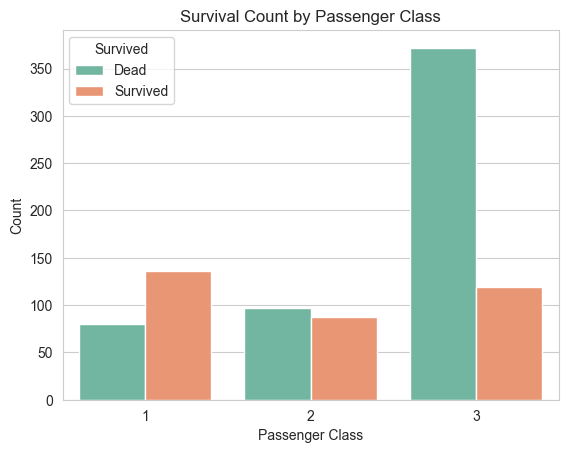

In [56]:
print(df.groupby('Pclass', observed=True)['Survived'].apply(lambda x: x.astype(int).mean() * 100))

sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Dead", "Survived"])
plt.show()


# **Correlation HeatMap**

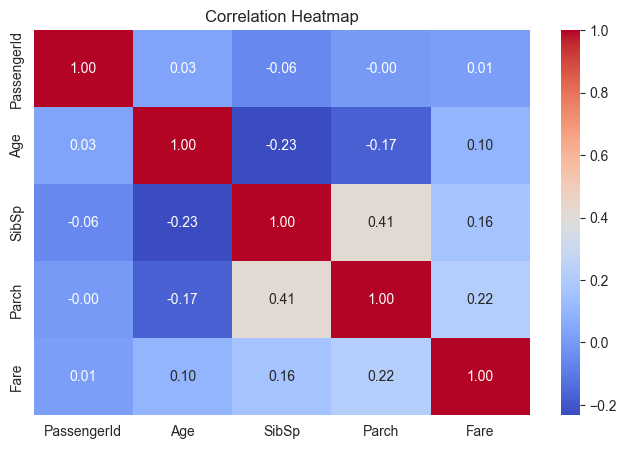

In [50]:
corr_matrix = df.corr(numeric_only=True)

# Heatmap visualization
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
